### Analyzing, visualizing and predicting local states in localization problem 
### Part-1: Visualization and Exploratory data analysis

#### Problem description
The background problem, boundary conditions etc. everything is same for this repository as described in [URHP](https://github.com/helalme/DataDrivenMSE/tree/master/UncertaintyReductionInHomogenization) 
repository. This means we will have 6 sets of local data/states/properties for 6 different cubic RVE ranging from 28.75 $\mu m$ to 128.75 $\mu m$ of side lengths. Since the dominant component is $\sigma_{33}$ in both lenghscales, we will consider this component only for this problem.

One thing is to be noted that the number of local states are different for every size of RVE. We can consider several locations for a property, like nodal points, Gauss points, etc. To reduce the data size we will consider one value of $\sigma_{33}$ for each element from FE-mesh, that is centrodal point. Using the distributions of $\sigma_{33}$ from the lower 
sized RVE, we will try to predict local states of a higher sized true SERVE. 

We will try to use less simulation data, in order to reduce complexities in time consuming simulations, that's why we will start with only 5 dataset. Lets visualize the data first. 

#### Importing necessary packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


#### Load the 5 dataset as Pandas dataframe, for cubic RVE sizes with side lengths 28.75, 48.74, 68.75, 88.75, and 108.75 $\mu m$. This means 28.75 size RVE approximately contains 13 grains, and thus 48.74 $\approx$ 50 grains,  68.74 $\approx$ 150 grains, 88.74 $\approx$ 350 grains, and  108.74 $\approx$ 550 grains. It is to be noted that a specific size of SERVE can be populated by different number of grains within a range. Although RVE size in terms of grains is not a very precise estimate, nevertheless, it is simple representation of RVE with number of grains. So for simplicity, we will use number of grains instead of side length of a cubic RVE.

In [2]:
data1=pd.read_csv('Data/S33-13g-20timestepsData.txt', delimiter="  ", header=None)
data2=pd.read_csv('Data/S33-50g-20timestepsData.txt', delimiter="  ", header=None)
data3=pd.read_csv('Data/S33-150g-20timestepsData.txt', delimiter="  ", header=None)
data4=pd.read_csv('Data/S33-300g-20timestepsData.txt', delimiter="  ", header=None)
data5=pd.read_csv('Data/S33-550g-20timestepsData.txt', delimiter="  ", header=None)

C:\Users\chow_he\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\chow_he\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\chow_he\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you ca

In [ ]:
#data6=pd.read_csv('Data/S33-900g-20timestepsData.txt', delimiter="  ",header=None )

In [ ]:
#data7=pd.read_csv('Data/S33-1400g-20timestepsData.txt', delimiter="  ",header=None )

In [ ]:
#data8=pd.read_csv('Data/S33-2000g-20timestepsData.txt', delimiter="  ",header=None )

#### Make a summay of 5 datasets, Let's have a look at the 5th set. The original simulations were for 200 seconds long, If we take 20 values for each simulation i.e. at every 10 seconds, then the original stress profiles look almost similar. 

In [3]:
summary1=data1.describe()
summary2=data2.describe()
summary3=data3.describe()
summary4=data4.describe()
summary5=data5.describe()
summary5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000,686273.000000
mean,-17.389657,-24.614832,-30.172132,-34.868774,-39.013109,-42.763514,-46.214638,-49.428563,-52.448576,-55.306245,-19.993737,15.438779,50.976588,86.607778,122.322597,158.112883,193.971778,229.893406,265.872707,301.905459
std,35.720953,42.718682,46.805533,49.677583,51.892382,53.700806,55.235134,56.572192,57.760067,58.830696,60.657736,62.470150,64.274026,66.073821,67.873032,69.674370,71.479914,73.291304,75.109752,76.936159
min,-236.075000,-263.350000,-277.800000,-287.312000,-294.325000,-299.775000,-304.250000,-308.088000,-311.425000,-314.387000,-281.475000,-248.375000,-215.075000,-181.637000,-148.050000,-114.350000,-80.572500,-46.705000,-12.762300,21.246700
25%,-25.983800,-36.861200,-45.177500,-52.091300,-57.981200,-63.217500,-67.990000,-72.440000,-76.645000,-80.620000,-46.892500,-13.105000,20.777500,54.741200,88.798700,122.962000,157.225000,191.575000,226.012000,260.538000
50%,-16.972500,-24.370000,-30.425000,-35.700000,-40.485000,-44.956200,-49.137500,-53.080000,-56.821200,-60.326200,-25.873700,8.775500,43.525000,78.362500,113.239000,148.162000,183.088000,218.013000,252.950000,287.937000
75%,-9.033600,-13.786200,-17.650000,-21.115000,-24.265000,-27.181200,-29.845000,-32.367500,-34.760000,-37.047500,-1.190900,34.658700,70.621300,106.587000,142.550000,178.625000,214.750000,251.075000,287.363000,323.663000
max,499.325000,507.575000,503.988000,497.700000,490.725000,483.663000,476.738000,470.075000,463.650000,457.513000,493.637000,530.038000,566.625000,603.438000,640.438000,677.625000,714.950000,752.438000,790.050000,827.788000


#### Let's visualize the distribution of data of the 1st set with a Violin Plot 

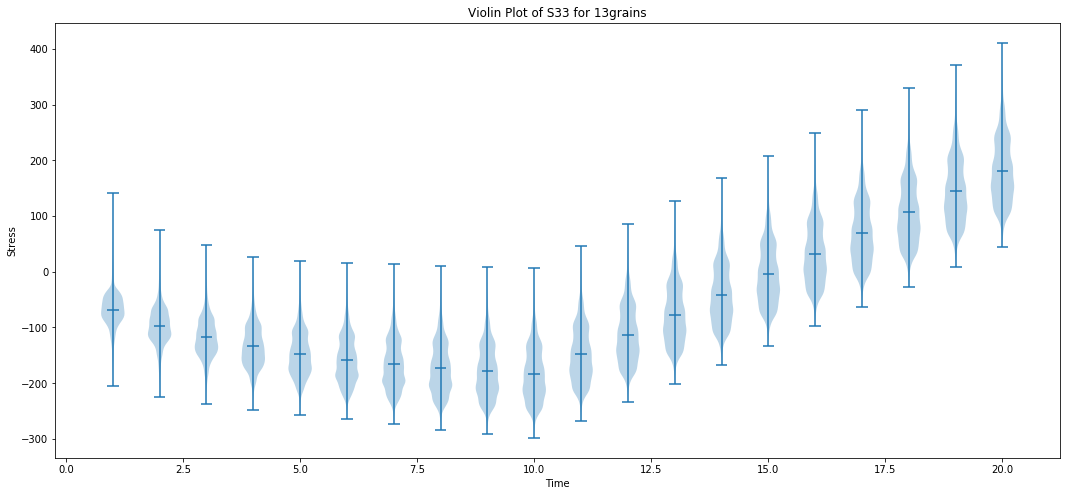

In [4]:
fig, axes = plt.subplots(figsize=(18,8))
axes.violinplot(dataset = [data1.iloc[:,i] for i in range(data1.shape[1])],showmeans=True)
plt.title('Violin Plot of S33 for 13grains')
plt.ylabel('Stress')
plt.xlabel('Time')
plt.show()

#### Visualization of the 2nd set with a Violin Plot 

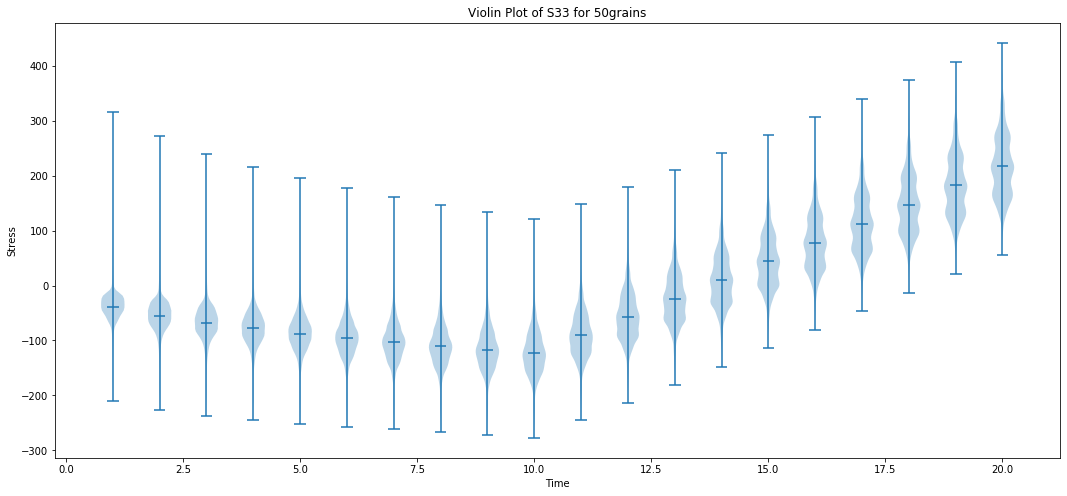

In [5]:
fig, axes = plt.subplots(figsize=(18,8))
axes.violinplot(dataset = [data2.iloc[:,i] for i in range(data2.shape[1])],showmeans=True)
plt.title('Violin Plot of S33 for 50grains')
plt.ylabel('Stress')
plt.xlabel('Time')
plt.show()

#### Visualization of the 3rd set with a Violin Plot 

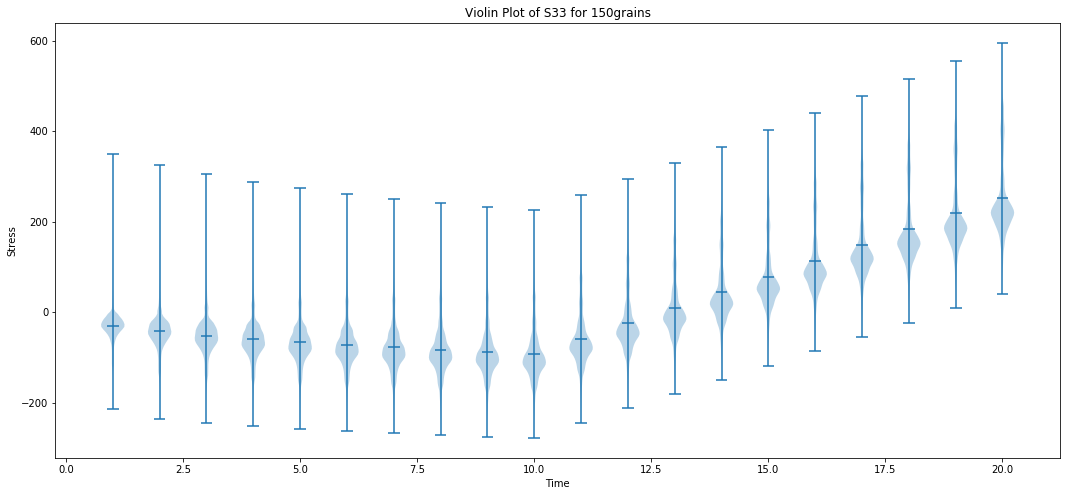

In [6]:
fig, axes = plt.subplots(figsize=(18,8))
axes.violinplot(dataset = [data3.iloc[:,i] for i in range(data3.shape[1])],showmeans=True)
plt.title('Violin Plot of S33 for 150grains')
plt.ylabel('Stress')
plt.xlabel('Time')
plt.show()

#### Visualization of the 4th set with a Violin Plot 

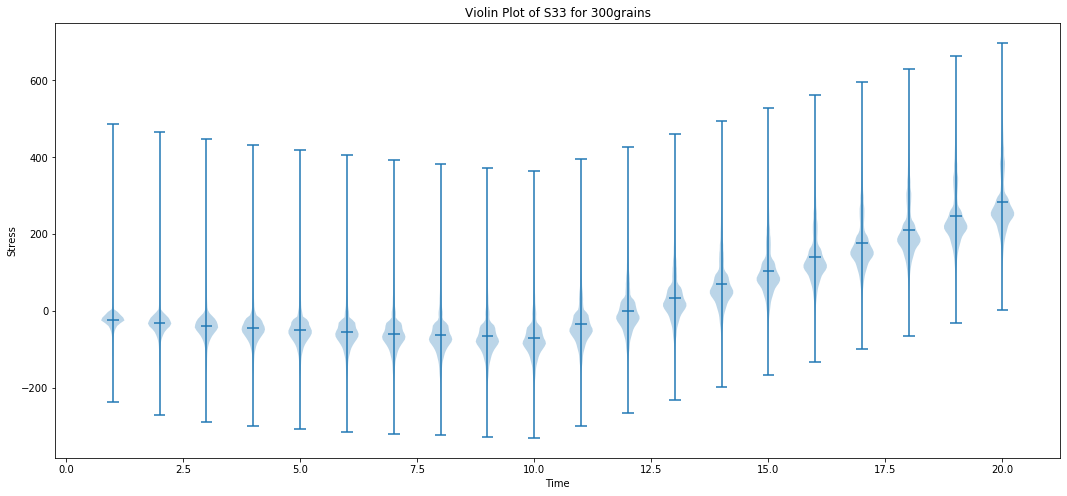

In [7]:
fig, axes = plt.subplots(figsize=(18,8))
axes.violinplot(dataset = [data4.iloc[:,i] for i in range(data4.shape[1])],showmeans=True)
plt.title('Violin Plot of S33 for 300grains')
plt.ylabel('Stress')
plt.xlabel('Time')
plt.show()

#### Visualization of the 5th set with a Violin Plot 

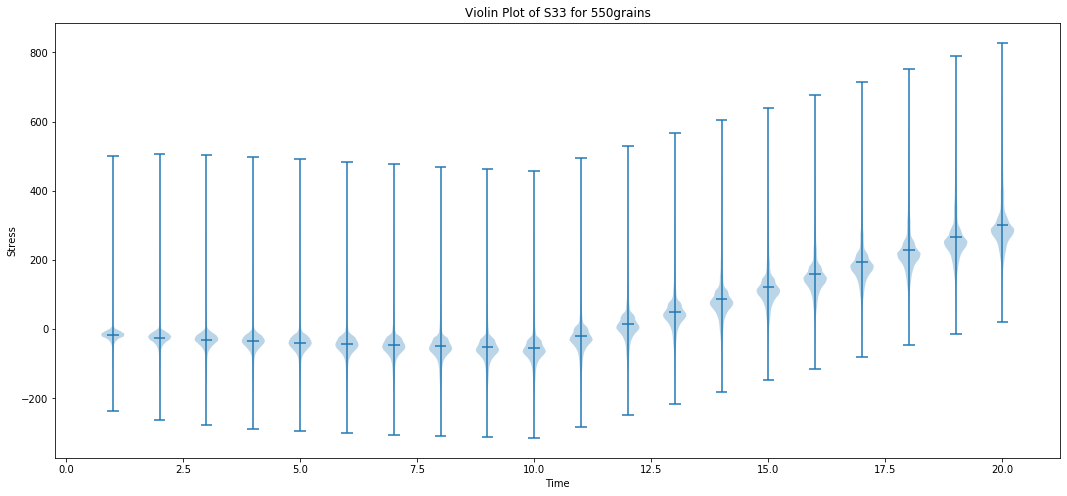

In [8]:
fig, axes = plt.subplots(figsize=(18,8))
axes.violinplot(dataset = [data5.iloc[:,i] for i in range(data5.shape[1])],showmeans=True)
plt.title('Violin Plot of S33 for 550grains')
plt.ylabel('Stress')
plt.xlabel('Time')
plt.show()

#### Let's visualize all datasets together 

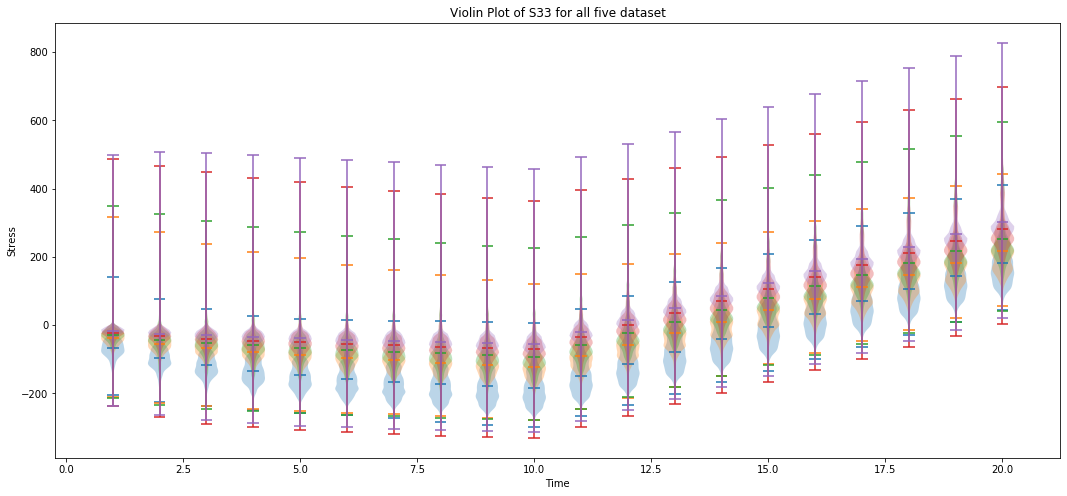

In [9]:
#takes more than 3 minutes

fig, axes = plt.subplots(figsize=(18,8))
axes.violinplot(dataset = [data1.iloc[:,i] for i in range(data1.shape[1])],showmeans=True)
axes.violinplot(dataset = [data2.iloc[:,i] for i in range(data2.shape[1])],showmeans=True)
axes.violinplot(dataset = [data3.iloc[:,i] for i in range(data3.shape[1])],showmeans=True)
axes.violinplot(dataset = [data4.iloc[:,i] for i in range(data4.shape[1])],showmeans=True)
axes.violinplot(dataset = [data5.iloc[:,i] for i in range(data5.shape[1])],showmeans=True)
plt.title('Violin Plot of S33 for all five dataset')
plt.ylabel('Stress')
plt.xlabel('Time')
plt.show()


#### It is clear from the above plot that the scattering ranges in upper sides of the above datasets are much higher  than that of the lower sides. If we observe the middle parts (i.e. the main distribution regions of data), we see that the corresponding regions are gradually squeezing with the increase of the RVE size.

### Point to be noted
Each time step in a data set contains the same number of datapoints equal to the number of elements. e.g. from 1st to 5th, the number of datapoints in each timestep are 14226, 65339, 177666,376741, and 686273 respectively. The local states of an SERVE we trying to predict might contains few millions of datapoints at each timestep. Predicting millions of local states at each timestep is probably formidable, that's why we will rather represent data space in a different way. Before going to predict let's see the way of presenting dataset in another format i.e. with Box and Whisker plots instead of Violin plots.  

#### Visualizing the 1st dataset with Box and Whisker Plot

Text(0.5, 0, 'Time')

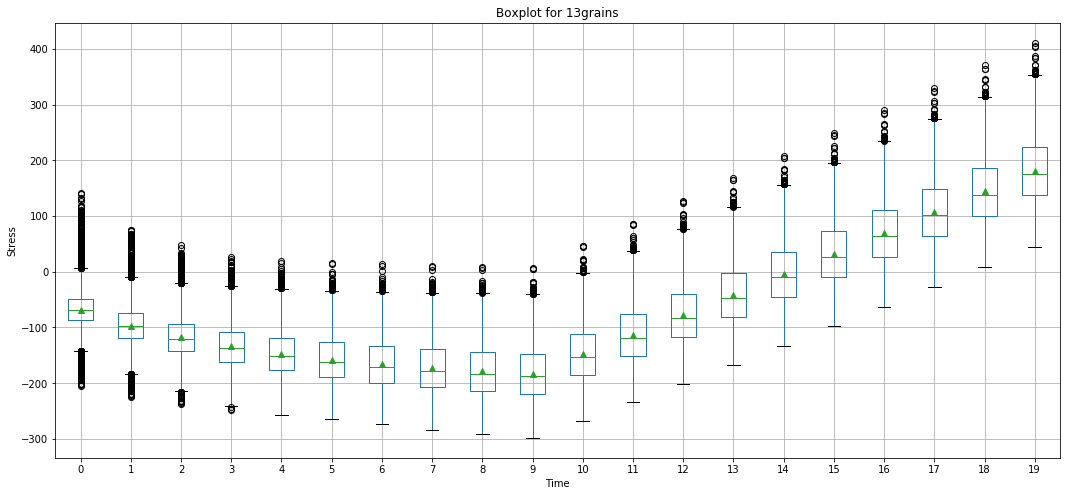

In [10]:
#bp1 object contains detail info of boxplot
_, bp1 = data1.boxplot(figsize=(18,8),showmeans=True, grid=True,return_type='both')
plt.title('Boxplot for 13grains')
plt.ylabel('Stress')
plt.xlabel('Time')
#locs, labels = plt.xticks()
#plt.plot(locs,summary1.iloc[1,:])
#plt.show()

#### Visualizing the 2nd dataset with Box and Whisker Plot

Text(0.5, 0, 'Time')

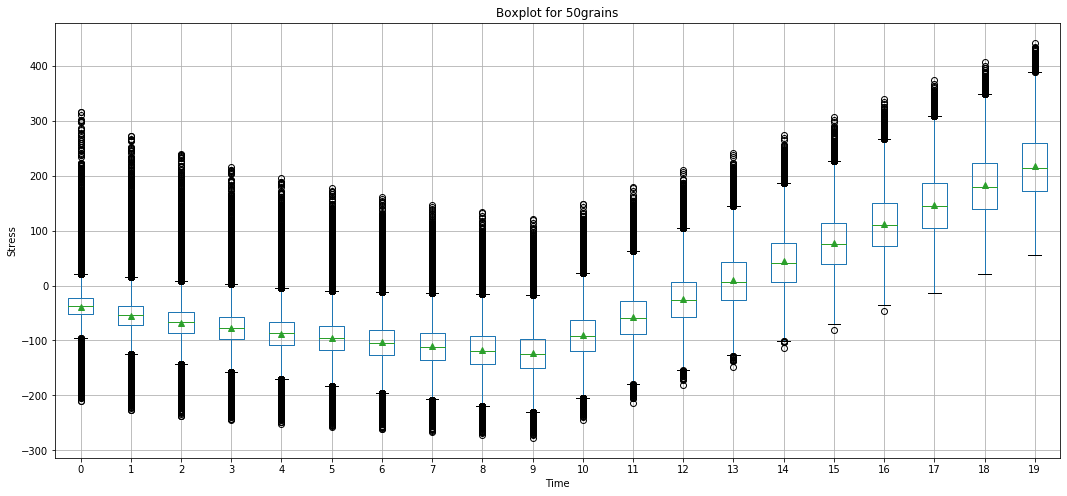

In [11]:
_, bp2 = data2.boxplot(figsize=(18,8),showmeans=True, grid=True,return_type='both')
plt.title('Boxplot for 50grains')
plt.ylabel('Stress')
plt.xlabel('Time')

#### Visualizing the 3rd dataset with Box and Whisker Plot

Text(0.5, 0, 'Time')

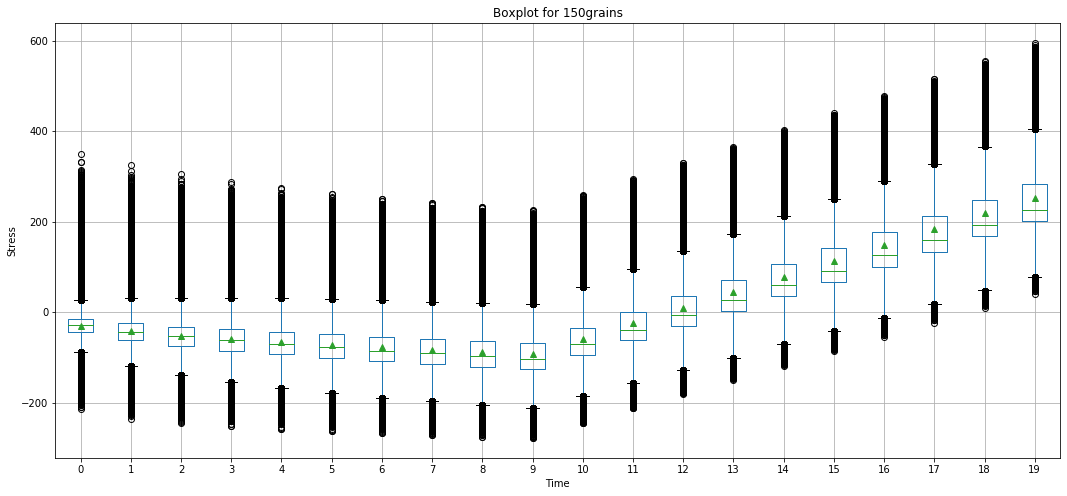

In [12]:
_, bp3 = data3.boxplot(figsize=(18,8),showmeans=True, grid=True,return_type='both')
plt.title('Boxplot for 150grains')
plt.ylabel('Stress')
plt.xlabel('Time')

#### Visualizing the 4th dataset with Box and Whisker Plot

Text(0.5, 0, 'Time')

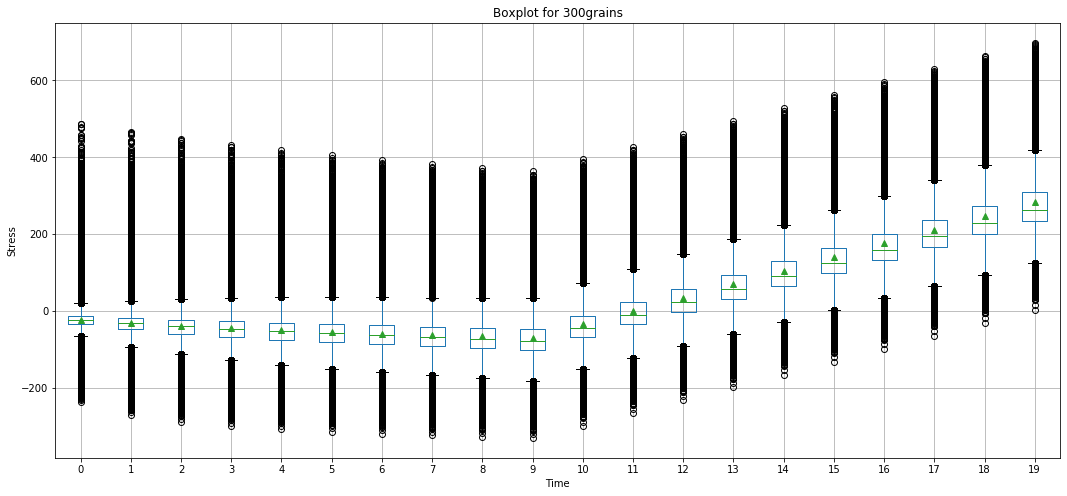

In [13]:
_, bp4 = data4.boxplot(figsize=(18,8),showmeans=True, grid=True,return_type='both')
plt.title('Boxplot for 300grains')
plt.ylabel('Stress')
plt.xlabel('Time')

#### Visualizing the 5th dataset with Box and Whisker Plot

Text(0.5, 0, 'Time')

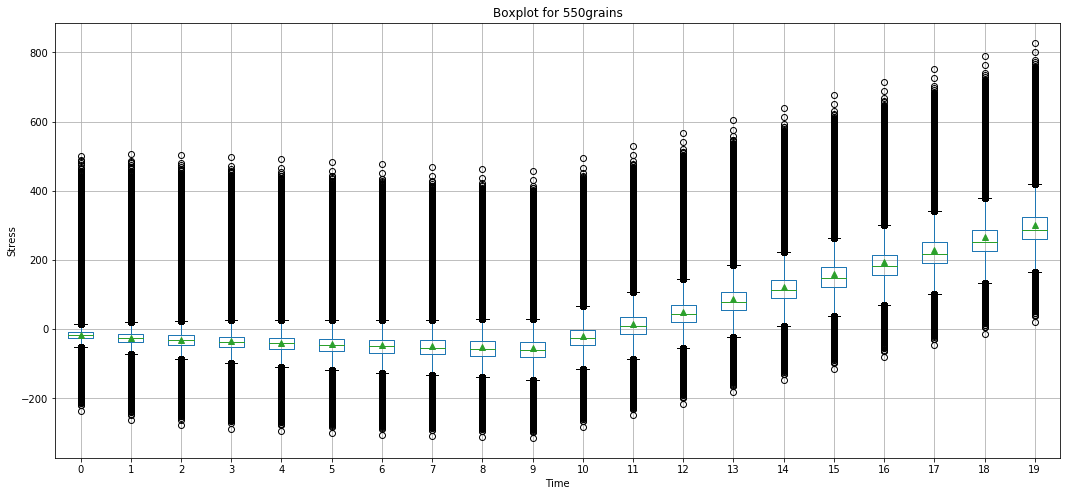

In [14]:
_, bp5 = data5.boxplot(figsize=(18,8),showmeans=True, grid=True,return_type='both')
plt.title('Boxplot for 550grains')
plt.ylabel('Stress')
plt.xlabel('Time')

#### Above 5 plots (Box and Whisker) are just another represention of datasets. This representation is simple to understand, where there is a box with three quantiles of data (Q1, Q2 and Q3) and two lines connected to the box are knows as Whiskers. The black circles in the upper and the lower sides of each box and whisker are know as outliers or fliers.  

#### For any dataset, 25th, 50th and 75th percentiles, or in other words, Q1 to Q3 are not changeable. However, the upper and the lower limit of whiskers is user dependent. Its default value is $1.5\times IQR$. All of the above 5 plots use this value of Whiskers.

#### From the repository [URHP](https://github.com/helalme/DataDrivenMSE/tree/master/UncertaintyReductionInHomogenization), we have seen that the side lenght of a truely cubic SERVE is approximately 168.75 $\mu m$. Now we will concentrate on how to predict the local states of the SERVE side length 168.75 $\mu m$ using the above 5 datasets.

#### We can use two approaches for that. A very simple approach would be to predict the mean and standard deviation of the expected size, from which the range of the distribution would be $\mu \pm 3\sigma$.  A more reliable approach would be to predict box and whiskers of that size using the lower sized RVE.  

#### Visualizing mean and standard deviations of the 5 datasets

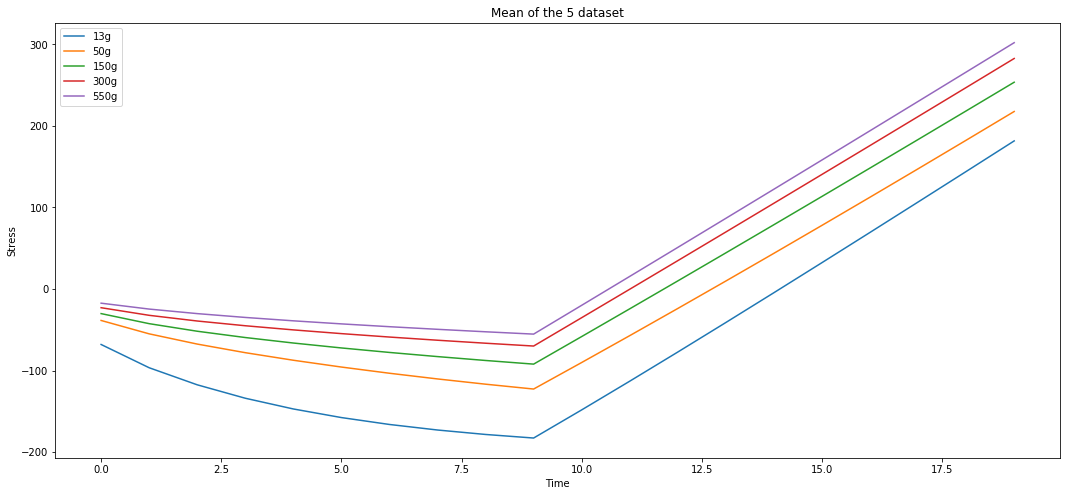

In [15]:
plt.figure(figsize=(18,8))
plt.plot(summary1.iloc[1,:], label='13g')
plt.plot(summary2.iloc[1,:], label='50g')
plt.plot(summary3.iloc[1,:], label='150g')
plt.plot(summary4.iloc[1,:], label='300g')
plt.plot(summary5.iloc[1,:], label='550g')
plt.title('Mean of the 5 dataset')
plt.ylabel('Stress')
plt.xlabel('Time')

plt.legend()
plt.show()

#### The above mean plot shows that the 5 dataset have a good trend for prediction. In fact, the 6th, 7th and 8th set of means using the above 5 sets have been predicted in the [URHP](https://github.com/helalme/DataDrivenMSE/tree/master/UncertaintyReductionInHomogenization) repository.

#### Now let's visualize standard deviations of the 5 datasets

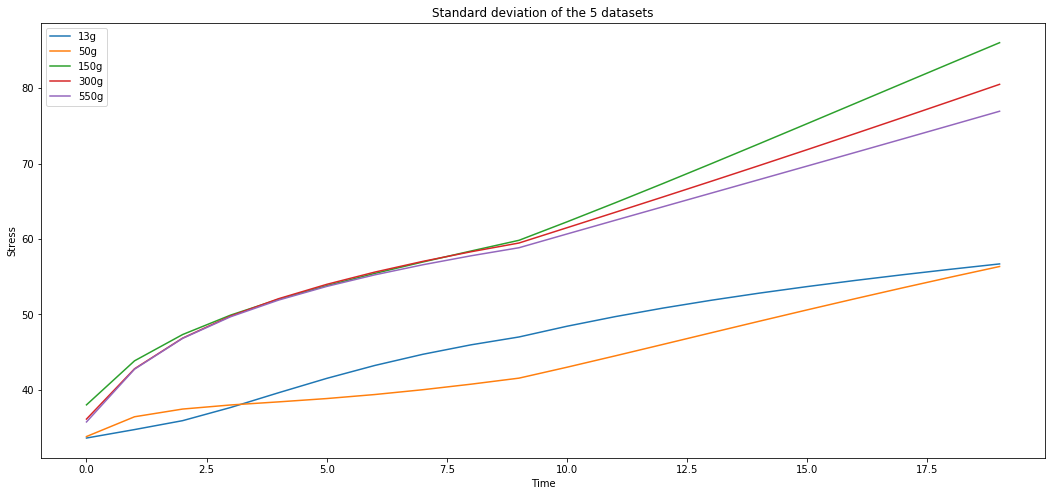

In [17]:
plt.figure(figsize=(18,8))
plt.plot(summary1.iloc[2,:], label='13g')
plt.plot(summary2.iloc[2,:], label='50g')
plt.plot(summary3.iloc[2,:], label='150g')
plt.plot(summary4.iloc[2,:], label='300g')
plt.plot(summary5.iloc[2,:], label='550g')
plt.title('Standard deviation of the 5 datasets')
plt.ylabel('Stress')
plt.xlabel('Time')

plt.legend()
plt.show()

#### Lets have a look at the first quantiles Q1 of the 5 datasets

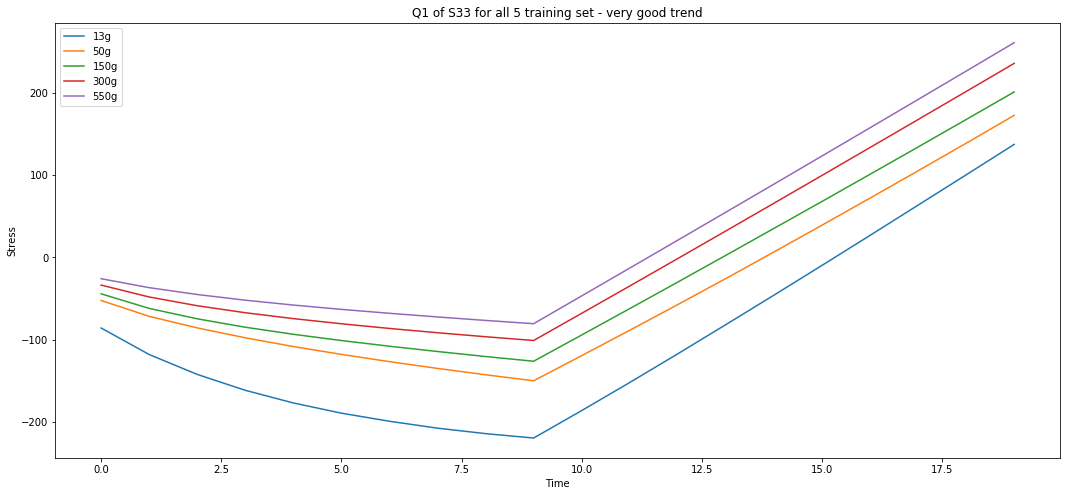

In [19]:
plt.figure(figsize=(18,8))
plt.plot(summary1.iloc[4,:], label='13g')
plt.plot(summary2.iloc[4,:], label='50g')
plt.plot(summary3.iloc[4,:], label='150g')
plt.plot(summary4.iloc[4,:], label='300g')
plt.plot(summary5.iloc[4,:], label='550g')
plt.title('Q1 of S33 for all 5 training set - very good trend')
plt.ylabel('Stress')
plt.xlabel('Time')

plt.legend()
plt.show()

#### Lets have a look at the second quantiles Q2 of the 5 datasets

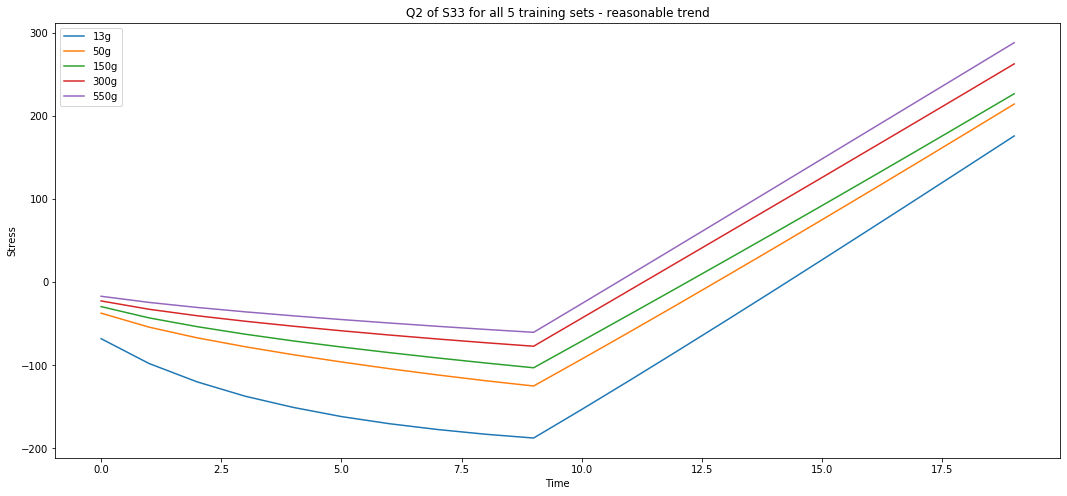

In [22]:
plt.figure(figsize=(18,8))
plt.plot(summary1.iloc[5,:], label='13g')
plt.plot(summary2.iloc[5,:], label='50g')
plt.plot(summary3.iloc[5,:], label='150g')
plt.plot(summary4.iloc[5,:], label='300g')
plt.plot(summary5.iloc[5,:], label='550g')
plt.title('Q2 of S33 for all 5 training sets - reasonable trend')
plt.ylabel('Stress')
plt.xlabel('Time')

plt.legend()
plt.show()

#### Lets have a look at the third quantiles Q3 of the 5 datasets

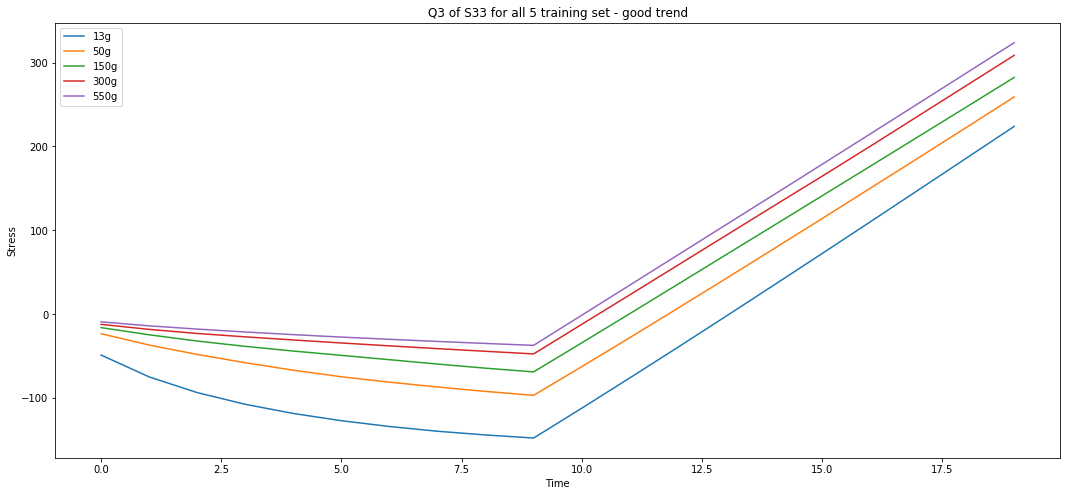

In [21]:
plt.figure(figsize=(18,8))
plt.plot(summary1.iloc[6,:], label='13g')
plt.plot(summary2.iloc[6,:], label='50g')
plt.plot(summary3.iloc[6,:], label='150g')
plt.plot(summary4.iloc[6,:], label='300g')
plt.plot(summary5.iloc[6,:], label='550g')
plt.title('Q3 of S33 for all 5 training set - good trend')
plt.ylabel('Stress')
plt.xlabel('Time')

plt.legend()
plt.show()

#### In the next notebooks we will try to predict std.deviation, Q1, Q1, Q3, etc. using the above 5 datasets as training set.


#### Now let's extract Q1, Q2, Q3, and st.dev data for the training of LSTM network and corresponding predictions 

In [23]:
with open('Data/Q1-13to550grains.txt', 'w') as f:
    f.write(''.join(' '.join(map(str, summary1.iloc[4,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary2.iloc[4,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary3.iloc[4,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary4.iloc[4,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary5.iloc[4,:]))))

In [24]:
with open('Data/Q2-13to550grains.txt', 'w') as f:
    f.write(''.join(' '.join(map(str, summary1.iloc[5,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary2.iloc[5,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary3.iloc[5,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary4.iloc[5,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary5.iloc[5,:]))))

In [25]:
with open('Data/Q3-13to550grains.txt', 'w') as f:
    f.write(''.join(' '.join(map(str, summary1.iloc[6,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary2.iloc[6,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary3.iloc[6,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary4.iloc[6,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary5.iloc[6,:]))))

In [26]:
with open('Data/stDev-13to550grains.txt', 'w') as f:
    f.write(''.join(' '.join(map(str, summary1.iloc[2,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary2.iloc[2,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary3.iloc[2,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary4.iloc[2,:]))))
    f.write('\n')
    f.write(''.join(' '.join(map(str, summary5.iloc[2,:]))))